In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('diabetes.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.shape


(768, 9)

In [6]:
data.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


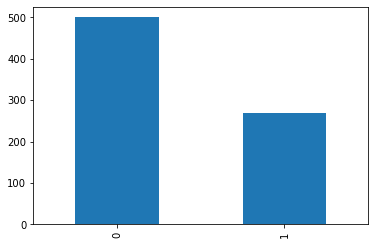

In [8]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

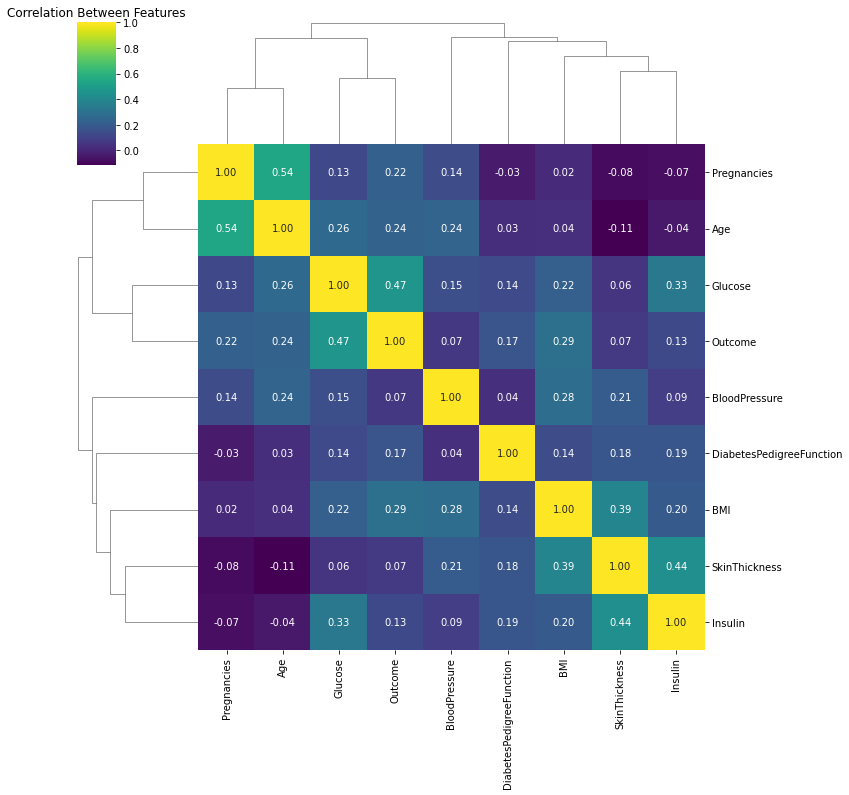

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", cmap = "viridis", figsize=(11,11))
plt.title("Correlation Between Features")
plt.show()

In [13]:
pd.crosstab(data.Pregnancies, data.Outcome)

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


In [14]:
pd.crosstab(data.Age, data.Outcome)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


In [15]:
pd.crosstab(data.BloodPressure, data.Outcome)

Outcome,0,1
BloodPressure,,
0,19,16
24,1,0
30,1,1
38,1,0
40,0,1
44,4,0
46,2,0
48,4,1
50,8,5


In [17]:
from sklearn.model_selection import train_test_split
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier 
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7402597402597403

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
print(knnclf.score(X_test,y_test))

0.7012987012987013


In [60]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=5000)
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.7467532467532467

In [61]:
algos = ["Decision Tree","Logistic Regression","K Nearest Neighbor"]
clfs = [DecisionTreeClassifier(),LogisticRegression(max_iter=5000),KNeighborsClassifier(n_neighbors=2)]
result = []

for clff in clfs:
    clff.fit(X_train,y_train)
    acc = clff.score(X_test,y_test)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

,Accuracy
Logistic Regression,0.746753
Decision Tree,0.727273
K Nearest Neighbor,0.701299


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)

# KNN

In [24]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X1 =  pd.DataFrame(SC.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

X1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [25]:
y1 = data.Outcome

In [26]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [27]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [62]:
max_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max is score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max is score 100.0 % and k = [1]


In [29]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.92207792207793 % and k = [12]


C:\Users\Yoda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yoda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


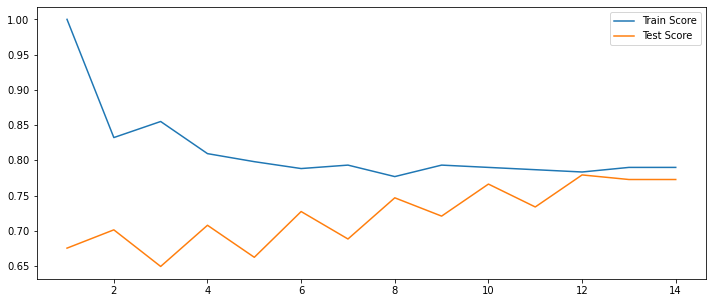

In [68]:
plt.figure(figsize=(12,5))
plot= sns.lineplot(range(1,15),train_scores,label='Train Score')
plot = sns.lineplot(range(1,15),test_scores,label='Test Score')

In [69]:
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7792207792207793

# LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=5000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_pred, y_test)
matrix

array([[78, 18],
       [21, 37]], dtype=int64)

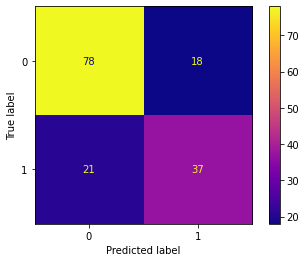

In [74]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=log.classes_),
                              display_labels=log.classes_)
cm.plot(cmap="plasma")

In [75]:
accuracy_score(y_pred, y_test)

0.7467532467532467